In [79]:
import numpy as np
from matplotlib import pyplot as plt

# Concrete Distribution

## Bernoulli Concrete Distribution

In [21]:
import torch
def concrete_bernoulli(x, p, tmp=.1):
    eps = 1e-8
    unif_noise = torch.FloatTensor(*x.size()).uniform_()

    drop_prob = (torch.log(p + eps) - torch.log((1-p) + eps) + torch.log(unif_noise + eps)
    - torch.log((1. - unif_noise) + eps))
    drop_prob = torch.sigmoid(drop_prob / tmp)

    return drop_prob

In [106]:
import torch.nn.functional as F

def concrete(x, log_a, tmp=.1, limit_a = 0, limit_b=1):
    eps = 1e-6
    unif_noise = torch.FloatTensor(*x.size()).uniform_()
    y = torch.sigmoid((torch.log(unif_noise + eps) - torch.log((1. - unif_noise) + eps) + log_a) / tmp)    
    return y * (limit_b - limit_a) + limit_a

def hard_concrete(x, log_a, tmp=.1):
    return F.hardtanh(concrete(x, log_a, tmp, -.1, 1.1), 0, 1)

In [107]:
log_a = np.arange(-10, 10, .5)
result = []
for i in log_a:
    result.append(concrete(torch.ones(1000), torch.tensor(i), tmp=.1))

# Concrete

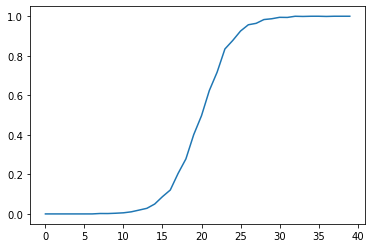

In [118]:
log_a = np.arange(-10, 10, .5)
result = []
for i in log_a:
    result.append(concrete(torch.ones(1000), torch.tensor(i), tmp=.1))

plt.plot(torch.stack(result).mean(axis=1))
plt.show()

# Hard Concrete

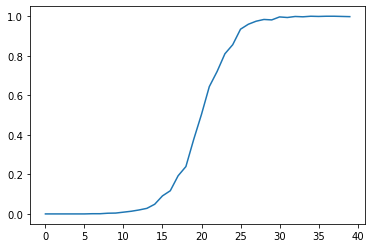

In [119]:
log_a = np.arange(-10, 10, .5)
result = []
for i in log_a:
    result.append(hard_concrete(torch.ones(1000), torch.tensor(i), tmp=.1))

plt.plot(torch.stack(result).mean(axis=1))
plt.show()

[]

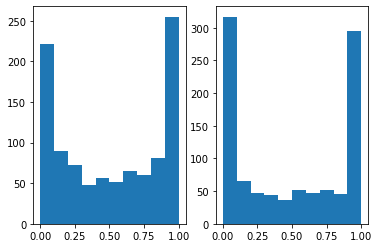

In [274]:
concrete_test = concrete(torch.ones(1000,1), torch.tensor(0), tmp=.5)
hard_concrete_test = hard_concrete(torch.ones(1000,1), torch.tensor(0), tmp=.5)

plt.subplot(1,2,1)
plt.hist(concrete_test.T)
plt.subplot(1,2,2)
plt.hist(hard_concrete_test.T)
plt.plot()

In [284]:
def cdf_qz(x, log_a, tmp=.1):
    """Implements the CDF of the 'stretched' concrete distribution"""
    limit_a, limit_b, eps = -.1, 1.1, 1e-8
    xn = (x - limit_a) / (limit_b - limit_a)
    logits = np.log(xn) - np.log(1 - xn)
    return torch.sigmoid(logits * tmp - log_a).clamp(min=eps, max=1 - eps)

In [288]:
x = torch.stack(result).mean(axis=1)
test = cdf_qz(torch.arange(0,1,.1), log_a[2], tmp=.1)

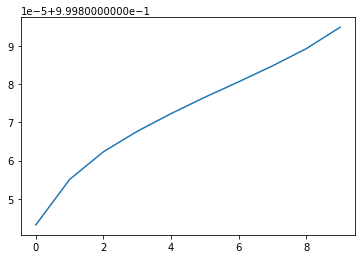

In [290]:
plt.plot(test)

In [281]:
test.sum()

tensor(9.9995)

ValueError: x and y must have same first dimension, but have shapes (40,) and torch.Size([10])

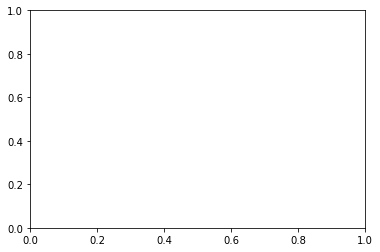

In [291]:
plt.plot(log_a, 1-test)
plt.xlabel(r'$log \alpha$')

In [196]:
1 / 50000


2e-05

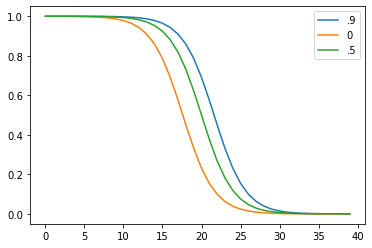

In [292]:
test = cdf_qz(torch.tensor(.9), log_a, tmp=.5)
test2 = cdf_qz(torch.tensor(0), log_a, tmp=.5)
test3 = cdf_qz(torch.tensor(.5), log_a, tmp=.5)

plt.plot(test, label='.9')
plt.plot(test2, label='0')
plt.plot(test3, label='.5')
plt.legend()

In [233]:
log_a

array([-10. ,  -9.5,  -9. ,  -8.5,  -8. ,  -7.5,  -7. ,  -6.5,  -6. ,
        -5.5,  -5. ,  -4.5,  -4. ,  -3.5,  -3. ,  -2.5,  -2. ,  -1.5,
        -1. ,  -0.5,   0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,
         3.5,   4. ,   4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,
         8. ,   8.5,   9. ,   9.5])

In [234]:
test

tensor([9.9998e-01, 9.9997e-01, 9.9994e-01, 9.9991e-01, 9.9985e-01, 9.9975e-01,
        9.9959e-01, 9.9933e-01, 9.9889e-01, 9.9818e-01, 9.9700e-01, 9.9506e-01,
        9.9188e-01, 9.8668e-01, 9.7822e-01, 9.6459e-01, 9.4293e-01, 9.0927e-01,
        8.5872e-01, 7.8663e-01, 6.9098e-01, 5.7560e-01, 4.5133e-01, 3.3286e-01,
        2.3232e-01, 1.5508e-01, 1.0018e-01, 6.3252e-02, 3.9344e-02, 2.4238e-02,
        1.4843e-02, 9.0555e-03, 5.5121e-03, 3.3505e-03, 2.0349e-03, 1.2352e-03,
        7.4955e-04, 4.5476e-04, 2.7588e-04, 1.6735e-04], dtype=torch.float64)

In [235]:
test = test2

In [244]:
log_a

array([-10. ,  -9.5,  -9. ,  -8.5,  -8. ,  -7.5,  -7. ,  -6.5,  -6. ,
        -5.5,  -5. ,  -4.5,  -4. ,  -3.5,  -3. ,  -2.5,  -2. ,  -1.5,
        -1. ,  -0.5,   0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,
         3.5,   4. ,   4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,
         8. ,   8.5,   9. ,   9.5])

In [254]:
np.log(0.00001)

-11.512925464970229